In [44]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/diabetes.csv')
print(myData.shape)

(768, 9)


In [45]:
peek = myData.head(10)
print(peek)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0            6      148             72             35        0  33.6                     0.627   
1            1       85             66             29        0  26.6                     0.351   
2            8      183             64              0        0  23.3                     0.672   
3            1       89             66             23       94  28.1                     0.167   
4            0      137             40             35      168  43.1                     2.288   
5            5      116             74              0        0  25.6                     0.201   
6            3       78             50             32       88  31.0                     0.248   
7           10      115              0              0        0  35.3                     0.134   
8            2      197             70             45      543  30.5                     0.158   
9            8      

In [46]:
shape = myData.shape
print(shape)

(768, 9)


In [47]:
types = myData.dtypes
print(types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [48]:
outcome_counts = myData.groupby('Outcome').size()
print(outcome_counts)

Outcome
0    500
1    268
dtype: int64


In [49]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

<AxesSubplot:ylabel='Frequency'>

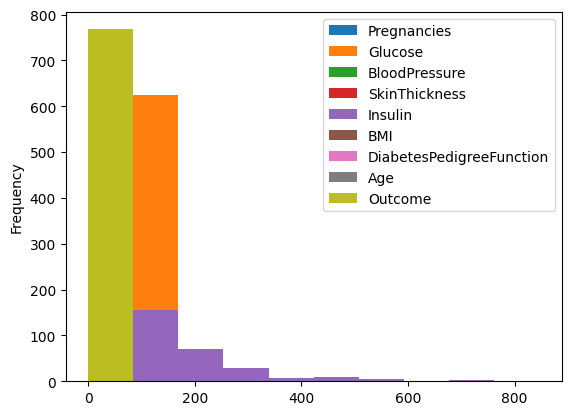

In [50]:
import matplotlib.pyplot as plt
myData.plot.hist()

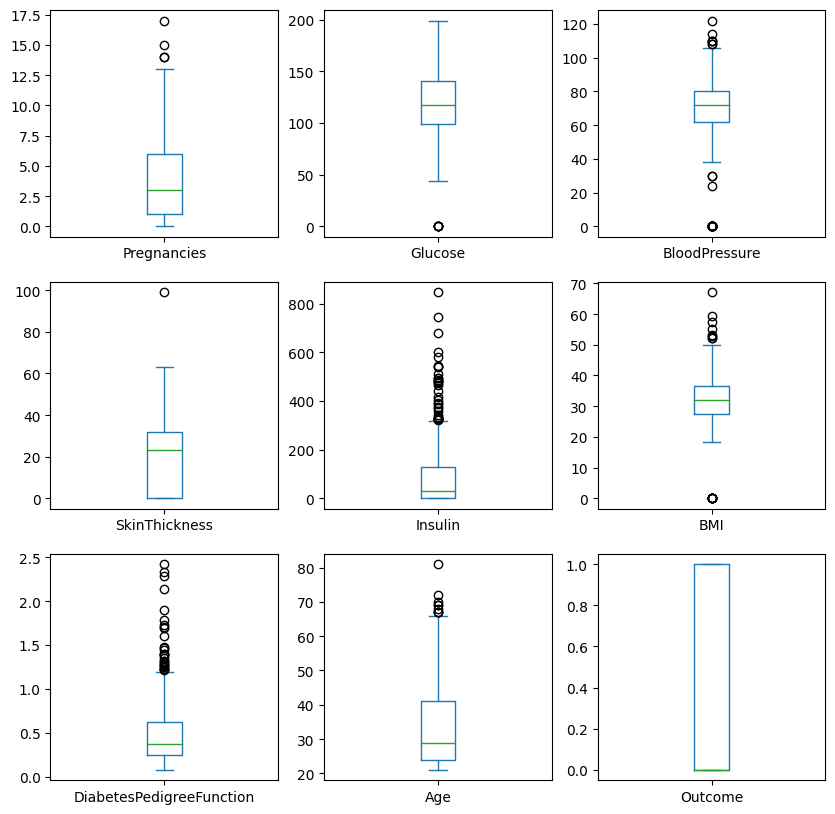

In [51]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

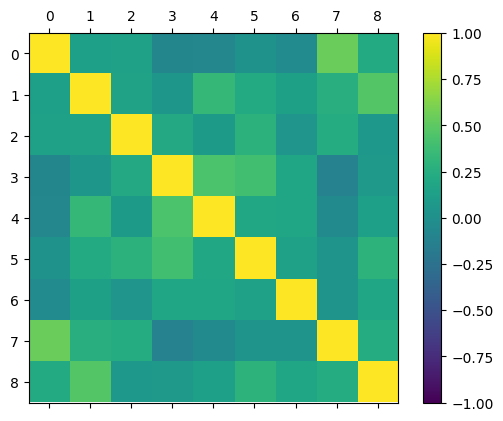

In [52]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111)
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [53]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

data = myData.values
X = data[:,0:8]
Y = data[:,8]

mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(X)
set_printoptions(precision = 3)
print(mydataRescaled[20:25,:])

[[0.176 0.633 0.721 0.414 0.278 0.586 0.267 0.1  ]
 [0.471 0.497 0.689 0.    0.    0.528 0.132 0.483]
 [0.412 0.985 0.738 0.    0.    0.593 0.159 0.333]
 [0.529 0.598 0.656 0.354 0.    0.432 0.079 0.133]
 [0.647 0.719 0.77  0.333 0.173 0.545 0.075 0.5  ]]


In [54]:
from sklearn.preprocessing import Normalizer

mydata_train = data[:,0:8]
mydata_label = data[:,8]

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)
set_printoptions(precision = 3)
print(mydataNormalized [20:25,:])

[[0.01  0.438 0.306 0.142 0.817 0.137 0.002 0.094]
 [0.056 0.689 0.584 0.    0.    0.246 0.003 0.348]
 [0.031 0.878 0.403 0.    0.    0.178 0.002 0.184]
 [0.059 0.775 0.521 0.228 0.    0.189 0.002 0.189]
 [0.047 0.606 0.398 0.14  0.618 0.155 0.001 0.216]]


In [55]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
myFeature = SelectKBest(score_func = chi2, k = 4) # k is number of top features to select
fit = myFeature.fit(mydata_train, mydata_label)
# summarize scores
set_printoptions(precision = 3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
mydataRFE = RFE(model)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)
print("Number of features: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features: 4
Selected features are denoted by True: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 4 5 1 1 2]


C:\Users\amire\Documents\Uni\DeepLearninProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [58]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [59]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(768, 2)


In [60]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(768, 4)


In [61]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.108 0.241 0.101 0.079 0.073 0.138 0.123 0.137]


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('../data/diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 0.6585 - accuracy: 0.6522 - val_loss: 0.6264 - val_accuracy: 0.6558
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6522 - val_loss: 0.5847 - val_accuracy: 0.6558
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.6522 - val_loss: 0.5547 - val_accuracy: 0.6623
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.6543 - val_loss: 0.5374 - val_accuracy: 0.6753
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.6565 - val_loss: 0.5295 - val_accuracy: 0.6948
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.6870 - val_loss: 0.5197 - val_accuracy: 0.7273
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7152 - val_loss: 0.5157 - val_accuracy: 0.7273
Epoch 8/50
46/46 [==